In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


2023-10-30 06:55:52.264273: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 06:55:52.371215: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-30 06:55:52.371250: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-30 06:55:52.389034: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-30 06:55:53.669518: W tensorflow/stream_executor/platform/de

In [ ]:
df = pd.read_csv('Airline_review.csv')

df.head()

,Review_Title,Review Date,Review,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Total Score,Review Period,sentiment,sentiment_score
0,"""pretty decent airline""",2019-01-01,moroni moheli . turned pretty decent airline ....,Solo Leisure,Economy Class,4.0,5.0,4.0,4.0,2.0,1.0,3.0,yes,23.0,0,1,0.9217
1,"""Not a good airline""",2019-01-01,moroni anjouan . small airline . ticket advise...,Solo Leisure,Economy Class,2.0,2.0,1.0,1.0,2.0,1.0,2.0,no,11.0,0,0,-0.0258
2,"""flight was fortunately short""",2019-01-01,anjouan dzaoudzi . small airline airline based...,Solo Leisure,Economy Class,2.0,1.0,1.0,1.0,2.0,1.0,2.0,no,10.0,0,1,0.8264
3,"""I will never fly again with Adria""",2019-01-01,please favor fly adria . route munich pristina...,Solo Leisure,Economy Class,1.0,1.0,2.0,1.0,2.0,1.0,1.0,no,9.0,0,0,-0.9054
4,"""it ruined our last days of holidays""",2019-01-01,book flight airline ! friend returned sofia am...,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,7.0,0,1,0.5255


In [ ]:
df = pd.get_dummies(df, columns=['Type Of Traveller'], prefix="Traveller")
df = pd.get_dummies(df, columns=['Seat Type'], prefix="Seat")

df

,Review_Title,Review Date,Review,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,...,sentiment_score,Traveller_Business,Traveller_Couple Leisure,Traveller_Family Leisure,Traveller_Other Type of Travellers,Traveller_Solo Leisure,Seat_Business Class,Seat_Economy Class,Seat_First Class,Seat_Premium Economy
0,"""pretty decent airline""",2019-01-01,moroni moheli . turned pretty decent airline ....,4.0,5.0,4.0,4.0,2.0,1.0,3.0,...,0.9217,0,0,0,0,1,0,1,0,0
1,"""Not a good airline""",2019-01-01,moroni anjouan . small airline . ticket advise...,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,-0.0258,0,0,0,0,1,0,1,0,0
2,"""flight was fortunately short""",2019-01-01,anjouan dzaoudzi . small airline airline based...,2.0,1.0,1.0,1.0,2.0,1.0,2.0,...,0.8264,0,0,0,0,1,0,1,0,0
3,"""I will never fly again with Adria""",2019-01-01,please favor fly adria . route munich pristina...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,...,-0.9054,0,0,0,0,1,0,1,0,0
4,"""it ruined our last days of holidays""",2019-01-01,book flight airline ! friend returned sofia am...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.5255,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23166,"""customer service is terrible""",2022-01-01,bangkok tokyo . ’ flown many low cost airline ...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,...,-0.9281,0,1,0,0,0,0,1,0,0
23167,"""Avoid at all costs""",2022-01-01,avoid cost . booked flight go singapore tokyo ...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,...,0.1298,0,0,0,0,1,0,1,0,0
23168,"""Will not recommend to anyone""",2022-01-01,flight leaving 23.15 hour half flying get back...,2.0,4.0,2.0,1.0,2.0,1.0,2.0,...,-0.2732,1,0,0,0,0,0,1,0,0
23169,"""It was immaculately clean""",2022-01-01,"zipair jal ’ budget airline . ’ class travel ,...",3.0,4.0,3.0,1.0,2.0,5.0,5.0,...,0.9908,1,0,0,0,0,1,0,0,0


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df['Recommended'] = label_encoder.fit_transform(df['Recommended'])

In [ ]:
pre_covid = df[df['Review Period'] == 0]
post_covid = df[df['Review Period'] == 1]

pre_covid.head()

,Review_Title,Review Date,Review,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,...,sentiment_score,Traveller_Business,Traveller_Couple Leisure,Traveller_Family Leisure,Traveller_Other Type of Travellers,Traveller_Solo Leisure,Seat_Business Class,Seat_Economy Class,Seat_First Class,Seat_Premium Economy
0,"""pretty decent airline""",2019-01-01,moroni moheli . turned pretty decent airline ....,4.0,5.0,4.0,4.0,2.0,1.0,3.0,...,0.9217,0,0,0,0,1,0,1,0,0
1,"""Not a good airline""",2019-01-01,moroni anjouan . small airline . ticket advise...,2.0,2.0,1.0,1.0,2.0,1.0,2.0,...,-0.0258,0,0,0,0,1,0,1,0,0
2,"""flight was fortunately short""",2019-01-01,anjouan dzaoudzi . small airline airline based...,2.0,1.0,1.0,1.0,2.0,1.0,2.0,...,0.8264,0,0,0,0,1,0,1,0,0
3,"""I will never fly again with Adria""",2019-01-01,please favor fly adria . route munich pristina...,1.0,1.0,2.0,1.0,2.0,1.0,1.0,...,-0.9054,0,0,0,0,1,0,1,0,0
4,"""it ruined our last days of holidays""",2019-01-01,book flight airline ! friend returned sofia am...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.5255,0,1,0,0,0,0,1,0,0


In [ ]:
# Standardization Process 
from sklearn.preprocessing import StandardScaler

#Pre_Covid
columns_feature = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages','Ground Service', 
'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money', 'Total Score', "Traveller_Business", "Traveller_Couple Leisure", "Traveller_Family Leisure", "Traveller_Other Type of Travellers", "Traveller_Solo Leisure", "Seat_Business Class", "Seat_Economy Class", "Seat_First Class", "Seat_Premium Economy"]
features_precovid = pre_covid[columns_feature]
features_precovid = StandardScaler().fit_transform(features_precovid)
features_precovid = pd.DataFrame(features_precovid, columns=columns_feature)

print("Transformed features_precovid variables:")
features_precovid.head()

Transformed features_precovid variables:


,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Total Score,Traveller_Business,Traveller_Couple Leisure,Traveller_Family Leisure,Traveller_Other Type of Travellers,Traveller_Solo Leisure,Seat_Business Class,Seat_Economy Class,Seat_First Class,Seat_Premium Economy
0,1.046647,1.509573,1.242199,1.207678,-0.052186,-0.19675,0.175930,1.028668,-0.350606,-0.480281,-0.389446,-0.69706,1.758311,-0.312209,0.515596,-0.085013,-0.136156
1,-0.468565,-0.556133,-1.154938,-1.046584,-0.052186,-0.19675,-0.470335,-0.775263,-0.350606,-0.480281,-0.389446,-0.69706,1.758311,-0.312209,0.515596,-0.085013,-0.136156
2,-0.468565,-1.244702,-1.154938,-1.046584,-0.052186,-0.19675,-0.470335,-0.925591,-0.350606,-0.480281,-0.389446,-0.69706,1.758311,-0.312209,0.515596,-0.085013,-0.136156
3,-1.226170,-1.244702,-0.355893,-1.046584,-0.052186,-0.19675,-1.116599,-1.075918,-0.350606,-0.480281,-0.389446,-0.69706,1.758311,-0.312209,0.515596,-0.085013,-0.136156
4,-1.226170,-1.244702,-1.154938,-1.046584,-1.041204,-0.19675,-1.116599,-1.376574,-0.350606,2.082114,-0.389446,-0.69706,-0.568728,-0.312209,0.515596,-0.085013,-0.136156


In [ ]:
#Post_Covid
features_postcovid = post_covid[columns_feature]
features_postcovid = StandardScaler().fit_transform(features_postcovid)
features_postcovid = pd.DataFrame(features_postcovid, columns=columns_feature)

print("Transformed features_postcovid variables:")
features_postcovid.head()

Transformed features_postcovid variables:


,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Total Score,Traveller_Business,Traveller_Couple Leisure,Traveller_Family Leisure,Traveller_Other Type of Travellers,Traveller_Solo Leisure,Seat_Business Class,Seat_Economy Class,Seat_First Class,Seat_Premium Economy
0,-0.292405,-1.066439,-1.029336,-0.776124,1.829541,0.813760,-0.752150,-0.407275,-0.374591,-0.601911,1.767680,-0.009228,-0.763851,-0.318739,0.400898,-0.094528,-0.196835
1,0.439573,-1.066439,0.617461,-0.776124,-0.110351,-0.323045,-0.752150,-0.407275,-0.374591,1.661375,-0.565713,-0.009228,-0.763851,-0.318739,0.400898,-0.094528,-0.196835
2,-0.292405,0.252070,0.617461,-0.113527,-1.080296,-0.323045,-0.092959,-0.133708,-0.374591,-0.601911,1.767680,-0.009228,-0.763851,-0.318739,0.400898,-0.094528,-0.196835
3,0.439573,-0.407185,-0.205937,-0.113527,-0.110351,-0.323045,-0.092959,-0.133708,-0.374591,1.661375,-0.565713,-0.009228,-0.763851,-0.318739,-2.494397,-0.094528,5.080404
4,-1.024383,-1.066439,-1.029336,-0.776124,-1.080296,-0.323045,-0.752150,-1.091192,-0.374591,1.661375,-0.565713,-0.009228,-0.763851,-0.318739,0.400898,-0.094528,-0.196835


In [ ]:
target = "Recommended"

target_precovid1 = pre_covid[target]
target_precovid1

target_postcovid1 = post_covid[target]
target_postcovid1

94       0
95       0
96       1
97       0
98       0
        ..
23166    0
23167    0
23168    0
23169    1
23170    0
Name: Recommended, Length: 11743, dtype: int64

In [ ]:
#For Pre-Covid
X1_train, X1_test, y1_train, y1_test = train_test_split(features_precovid, target_precovid1, test_size = 0.2, random_state = 42)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Initialize the model
model1 = Sequential()

#Add first input layer
model1.add(Dense(64, input_dim=X1_train.shape[1], activation='relu'))

#Add second layer
model1.add(Dense(32, activation='relu'))

#Add final and output layer
model1.add(Dense(1, activation='sigmoid'))

#Compile the model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit and Train the model
model1.fit(X1_train, y1_train, epochs=100, batch_size=32, validation_data=(X1_test, y1_test))


2023-10-30 06:55:56.925796: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-30 06:55:56.925836: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-30 06:55:56.925856: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-4e2d7258-be81-4486-bc85-234b0cc7a7d6): /proc/driver/nvidia/version does not exist
2023-10-30 06:55:56.926296: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Epoch 1/100
286/286 [==============================] - 1s 3ms/step - loss: 0.2466 - 

<img src="image-20231023-180844.png" width="" align="" />

<img src="image-20231023-180805.png" width="" align="" />

<img src="image-20231023-180752.png" width="" align="" />

<img src="image-20231023-180736.png" width="" align="" />

<img src="image-20231023-180658.png" width="" align="" />

<img src="image-20231022-222818.png" width="" align="" />

In [ ]:
#pip install pygraphviz

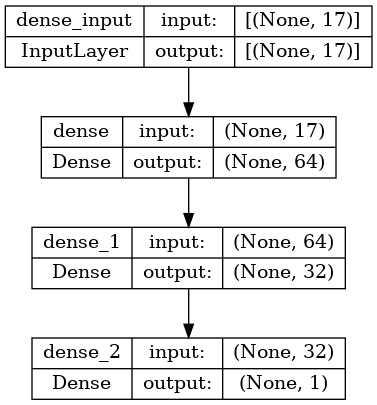

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model1, to_file='pre-covid_recommended.png', show_shapes=True)

In [ ]:
from ann_visualizer.visualize import ann_viz

In [ ]:
# Visualize the neural network -> generate the pdf file
#ann_viz(model, title="Pre-Covid Data Neural Network", view=False, filename="pre-covid.gv")

ann_viz(model1, title="pre_covid_recommended_nn",view=False, filename="pre_covid_recommended_nn.gv")

In [ ]:
# Make predictions on the test data
y1_pred = model1.predict(X1_test)
y1_pred_binary = (y1_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y1_test, y1_pred_binary)

# Classification Error (Misclassification Rate)
classification_error = 1 - accuracy

# Confusion Matrix
conf_matrix = confusion_matrix(y1_test, y1_pred_binary)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Recall
recall = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

# Precision
precision = tp / (tp + fp)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the results
print("Accuracy:", accuracy)
print("Classification Error:", classification_error)
print("Recall:", recall)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_score)

# Additional classification report
report = classification_report(y1_test, y1_pred_binary)
print("\nClassification Report for pre-covid data:\n", report)


72/72 [==============================] - 0s 689us/step
Accuracy: 0.926509186351706
Classification Error: 0.07349081364829402
Recall: 0.8992248062015504
Specificity: 0.94896331738437
Precision: 0.9354838709677419
F1 Score: 0.9169960474308301

Classification Report for pre-covid data:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      1254
           1       0.94      0.90      0.92      1032

    accuracy                           0.93      2286
   macro avg       0.93      0.92      0.93      2286
weighted avg       0.93      0.93      0.93      2286



In [ ]:
#For Post-Covid
X2_train, X2_test, y2_train, y2_test = train_test_split(features_postcovid, target_postcovid1, test_size = 0.2, random_state = 42)

In [ ]:
#Initialize the model
model2 = Sequential()

#Add first input layer
model2.add(Dense(64, input_dim=X2_train.shape[1], activation='relu'))

#Add second layer
model2.add(Dense(32, activation='relu'))

#Add final and output layer
model2.add(Dense(1, activation='sigmoid'))

#Compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit and Train the model
model2.fit(X2_train, y2_train, epochs=100, batch_size=32, validation_data=(X2_test, y2_test))


Epoch 1/100
294/294 [==============================] - 1s 2ms/step - loss: 0.1625 - accuracy: 0.9496 - val_loss: 0.0896 - val_accuracy: 0.9706
Epoch 2/100
294/294 [==============================] - 1s 2ms/step - loss: 0.1191 - accuracy: 0.9595 - val_loss: 0.0891 - val_accuracy: 0.9672
Epoch 3/100
294/294 [==============================] - 1s 2ms/step - loss: 0.1167 - accuracy: 0.9590 - val_loss: 0.0903 - val_accuracy: 0.9651
Epoch 4/100
294/294 [==============================] - 1s 2ms/step - loss: 0.1147 - accuracy: 0.9598 - val_loss: 0.0897 - val_accuracy: 0.9651
Epoch 5/100
294/294 [==============================] - 1s 2ms/step - loss: 0.1138 - accuracy: 0.9623 - val_loss: 0.0880 - val_accuracy: 0.9685
Epoch 6/100
294/294 [==============================] - 1s 2ms/step - loss: 0.1120 - accuracy: 0.9619 - val_loss: 0.0893 - val_accuracy: 0.9676
Epoch 7/100
294/294 [==============================] - 1s 2ms/step - loss: 0.1114 - accuracy: 0.9620 - val_loss: 0.0892 - val_accuracy: 0.9664

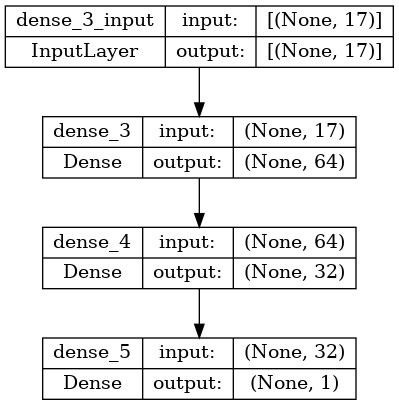

In [ ]:
plot_model(model2, to_file='post-covid_recommended.png', show_shapes=True)

In [ ]:
#Visualize the neural network -> generate the pdf file
#ann_viz(model2, title="Post-Covid Data Neural Network", view=False, filename="post-covid.gv")

In [ ]:
# Make predictions on the test data
y2_pred = model2.predict(X2_test)
y2_pred_binary = (y2_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Accuracy
accuracy = accuracy_score(y2_test, y2_pred_binary)

# Classification Error (Misclassification Rate)
classification_error = 1 - accuracy

# Confusion Matrix
conf_matrix = confusion_matrix(y2_test, y2_pred_binary)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Recall
recall = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

# Precision
precision = tp / (tp + fp)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the results
print("Accuracy:", accuracy)
print("Classification Error:", classification_error)
print("Recall:", recall)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_score)

# Additional classification report
report = classification_report(y2_test, y2_pred_binary)
print("\nClassification Report for post-covid data:\n", report)


74/74 [==============================] - 0s 853us/step
Accuracy: 0.9625372498935717
Classification Error: 0.0374627501064283
Recall: 0.9413919413919414
Specificity: 0.968940654464781
Precision: 0.9017543859649123
F1 Score: 0.9211469534050181

Classification Report for post-covid data:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1803
           1       0.90      0.94      0.92       546

    accuracy                           0.96      2349
   macro avg       0.94      0.96      0.95      2349
weighted avg       0.96      0.96      0.96      2349



In [ ]:
target = "sentiment"

target_precovid2 = pre_covid[target]
target_precovid2

target_postcovid2 = post_covid[target]
target_postcovid2

94       0
95       0
96       1
97       1
98       0
        ..
23166    0
23167    1
23168    0
23169    1
23170    0
Name: sentiment, Length: 11743, dtype: int64

In [ ]:
#For Pre-Covid
X3_train, X3_test, y3_train, y3_test = train_test_split(features_precovid, target_precovid2, test_size = 0.2, random_state = 42)

In [ ]:
#Initialize the model
model3 = Sequential()

#Add first input layer
model3.add(Dense(64, input_dim=X3_train.shape[1], activation='relu'))

#Add second layer
model3.add(Dense(32, activation='relu'))

#Add final and output layer
model3.add(Dense(1, activation='sigmoid'))

#Compile the model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit and Train the model
model3.fit(X3_train, y3_train, epochs=100, batch_size=32, validation_data=(X3_test, y3_test))


Epoch 1/100
286/286 [==============================] - 1s 2ms/step - loss: 0.4864 - accuracy: 0.7598 - val_loss: 0.4493 - val_accuracy: 0.7905
Epoch 2/100
286/286 [==============================] - 1s 2ms/step - loss: 0.4589 - accuracy: 0.7813 - val_loss: 0.4487 - val_accuracy: 0.7953
Epoch 3/100
286/286 [==============================] - 1s 2ms/step - loss: 0.4559 - accuracy: 0.7843 - val_loss: 0.4461 - val_accuracy: 0.7962
Epoch 4/100
286/286 [==============================] - 1s 2ms/step - loss: 0.4538 - accuracy: 0.7865 - val_loss: 0.4461 - val_accuracy: 0.7935
Epoch 5/100
286/286 [==============================] - 1s 2ms/step - loss: 0.4522 - accuracy: 0.7868 - val_loss: 0.4453 - val_accuracy: 0.8040
Epoch 6/100
286/286 [==============================] - 1s 2ms/step - loss: 0.4507 - accuracy: 0.7898 - val_loss: 0.4449 - val_accuracy: 0.8053
Epoch 7/100
286/286 [==============================] - 1s 2ms/step - loss: 0.4501 - accuracy: 0.7915 - val_loss: 0.4434 - val_accuracy: 0.8023

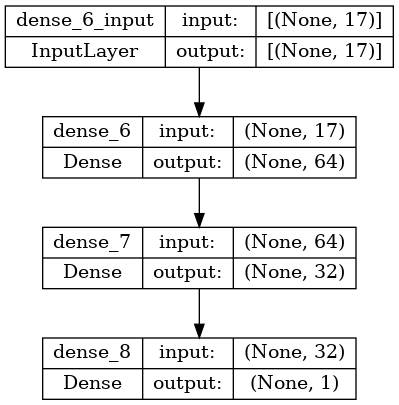

In [ ]:
plot_model(model3, to_file='pre-covid_sentiment.png', show_shapes=True)

In [ ]:
# Make predictions on the test data
y3_pred = model3.predict(X3_test)
y3_pred_binary = (y3_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y3_test, y3_pred_binary)

# Classification Error (Misclassification Rate)
classification_error = 1 - accuracy

# Confusion Matrix
conf_matrix = confusion_matrix(y3_test, y3_pred_binary)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Recall
recall = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

# Precision
precision = tp / (tp + fp)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the results
print("Accuracy:", accuracy)
print("Classification Error:", classification_error)
print("Recall:", recall)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_score)

# Additional classification report
report = classification_report(y3_test, y3_pred_binary)
print("\nClassification Report for pre-covid data:\n", report)


72/72 [==============================] - 0s 1ms/step
Accuracy: 0.7821522309711286
Classification Error: 0.21784776902887137
Recall: 0.8063858695652174
Specificity: 0.7383292383292384
Precision: 0.8478571428571429
F1 Score: 0.8266016713091922

Classification Report for pre-covid data:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71       814
           1       0.85      0.81      0.83      1472

    accuracy                           0.78      2286
   macro avg       0.76      0.77      0.77      2286
weighted avg       0.79      0.78      0.78      2286



In [ ]:
#For Post-Covid
X4_train, X4_test, y4_train, y4_test = train_test_split(features_postcovid, target_postcovid2, test_size = 0.2, random_state = 42)

In [ ]:
#Initialize the model
model4 = Sequential()

#Add first input layer
model4.add(Dense(64, input_dim=X4_train.shape[1], activation='relu'))

#Add second layer
model4.add(Dense(32, activation='relu'))

#Add final and output layer
model4.add(Dense(1, activation='sigmoid'))

#Compile the model
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit and Train the model
model4.fit(X4_train, y4_train, epochs=100, batch_size=32, validation_data=(X4_test, y4_test))


Epoch 1/100
294/294 [==============================] - 1s 2ms/step - loss: 0.5218 - accuracy: 0.7475 - val_loss: 0.5083 - val_accuracy: 0.7582
Epoch 2/100
294/294 [==============================] - 1s 2ms/step - loss: 0.5081 - accuracy: 0.7554 - val_loss: 0.5085 - val_accuracy: 0.7552
Epoch 3/100
294/294 [==============================] - 1s 2ms/step - loss: 0.5055 - accuracy: 0.7542 - val_loss: 0.5068 - val_accuracy: 0.7573
Epoch 4/100
294/294 [==============================] - 1s 2ms/step - loss: 0.5045 - accuracy: 0.7580 - val_loss: 0.5068 - val_accuracy: 0.7544
Epoch 5/100
294/294 [==============================] - 1s 2ms/step - loss: 0.5021 - accuracy: 0.7593 - val_loss: 0.5058 - val_accuracy: 0.7565
Epoch 6/100
294/294 [==============================] - 1s 2ms/step - loss: 0.5016 - accuracy: 0.7588 - val_loss: 0.5093 - val_accuracy: 0.7565
Epoch 7/100
294/294 [==============================] - 1s 2ms/step - loss: 0.5002 - accuracy: 0.7594 - val_loss: 0.5105 - val_accuracy: 0.7548

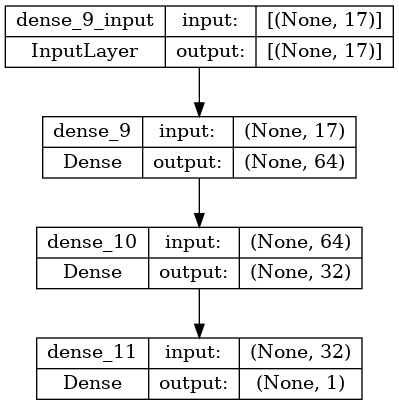

In [ ]:
plot_model(model4, to_file='post-covid_sentiment.png', show_shapes=True)

In [ ]:
# Make predictions on the test data
y4_pred = model4.predict(X4_test)
y4_pred_binary = (y4_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Accuracy
accuracy = accuracy_score(y4_test, y4_pred_binary)

# Classification Error (Misclassification Rate)
classification_error = 1 - accuracy

# Confusion Matrix
conf_matrix = confusion_matrix(y4_test, y4_pred_binary)

# True Positives, True Negatives, False Positives, False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Recall
recall = tp / (tp + fn)

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

# Precision
precision = tp / (tp + fp)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Display the results
print("Accuracy:", accuracy)
print("Classification Error:", classification_error)
print("Recall:", recall)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_score)

# Additional classification report
report = classification_report(y4_test, y4_pred_binary)
print("\nClassification Report for post-covid data:\n", report)


74/74 [==============================] - 0s 949us/step
Accuracy: 0.741166453810132
Classification Error: 0.258833546189868
Recall: 0.5864734299516908
Specificity: 0.863013698630137
Precision: 0.7712833545108005
F1 Score: 0.6663007683863886

Classification Report for post-covid data:
               precision    recall  f1-score   support

           0       0.73      0.86      0.79      1314
           1       0.77      0.59      0.67      1035

    accuracy                           0.74      2349
   macro avg       0.75      0.72      0.73      2349
weighted avg       0.75      0.74      0.73      2349



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4e2d7258-be81-4486-bc85-234b0cc7a7d6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>